In [ ]:
!pip install emoji
!pip install transformers

     |████████████████████████████████| 133kB 8.2MB/s 
     |████████████████████████████████| 2.5MB 7.9MB/s 
     |████████████████████████████████| 901kB 33.7MB/s 
     |████████████████████████████████| 3.3MB 37.1MB/s 


# Thư viện

In [ ]:
from numpy import mean
from numpy import std
import emoji
from sklearn.naive_bayes import ComplementNB
import seaborn as sb
from gensim.models import KeyedVectors

import keras
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from keras.utils.np_utils import to_categorical
from sklearn.multioutput import MultiOutputClassifier
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Flatten, Dropout, LSTM, Bidirectional, GRU
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from keras.models import load_model
from joblib import dump
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 0, 0, 0, 1]

print(f1_score(y_true,y_pred,average = "micro"))
print(precision_score(y_true,y_pred,average = "micro"))
print(recall_score(y_true,y_pred,average = "micro"))

# Đọc dữ liệu

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Tail/APD_train_tail.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Tail/APD_dev_tail.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Tail/APD_test_tail.csv')

df_train.head(10)

,text,polarity
0,Giá 53k size vừa. đồ uống giá tiền,1
1,Giá 53k size vừa. đồ uống loại,1
2,Nhưng nói chung cũng hơi đắt. nhà hàng giá tiền,0
3,Mình ăn rất hôi mùi dầu. thức ăn chất lượng,0
4,Mình ăn chưa baoh thấy mùi hôi hải sản. thức ă...,2
5,3 dĩa vs 2 lon Revive mà có 190k thui(. nhà hà...,2
6,Ở đây ngay khu vắng nên khách cũng không đông ...,1
7,"Quán đông lắm, gọi món phải đợi hơi lâu, ko bi...",2
8,"Quán đông lắm, gọi món phải đợi hơi lâu, ko bi...",0
9,"Mình uống trà sữa lài hạnh nhân khá thơm nha, ...",2


# Hàm tiền xử lý

In [ ]:
# Xóa code html
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

# xóa link
def remove_url(document):
    document = re.sub(r"(http\S+)|(www\S+)", '', document)
    return document

# xóa tag user
def remove_tag_user(document):
    document = re.sub(r"(@\w{1,15})", '', document)
    return document

# xóa hashtags
def remove_hashtags(document):
    document = re.sub("#(\w{1,})", '', document)
    return document

# Chuẩn hóa unicode
import regex as re
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

# Chuẩn hóa dấu tiếng việt
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']
nguyen_am_to_ids = {}
for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word
    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9: 
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5: 
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True
def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

# VNCoreNLP tách từ
!pip install deplacy vncorenlp
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="wseg")
def vncore_tokenize(document):
    l = vncorenlp.tokenize(document)[0]
    document = ''
    for i in range(len(l)):
        document += l[i] + ' '
    document = document[:-1]
    return document

# Stopword
def stopword(path):
    stopwords = []
    f = open(path, 'r')
    for line in f:
        line = line.rstrip()
        line = line.replace(' ', '_')
        stopwords.append(line)
    f.close()
    return stopwords
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/vietnamese-stopwords.txt'
stopwords = stopword(path)
def remove_stopword(text):
    text_new = ''
    list_word = text.split()
    for word in list_word:
        if word not in stopwords:
            text_new += word + ' '
    text_new = text_new[:-1]
    return text_new

# Chuẩn hóa từ về dạng chuẩn (ngonnnn thành ngon)
def standardize_word(text):
    new_text = []
    for i in range(len(text)):
        if i == 0 or (text[i-1] != text[i]):
            new_text.append(text[i])
    new_text = "".join(new_text)
    return new_text

# Chuyển emotion, emoji thành word form
def load_emoticon_to_word_dict(file_path):
    the_dict = pd.read_excel(file_path).to_dict()
    emoticon_to_word = dict((v,key) for key,value in the_dict.items() for v in value.values() if type(v) is str)
    return emoticon_to_word
def load_word_dict_to_vietnameses(file_path):
    eng_to_vie_df = pd.read_excel(file_path)
    eng_to_vie = dict(zip(eng_to_vie_df.Emojize, eng_to_vie_df.Translated))
    return eng_to_vie
emoticon_to_word = load_emoticon_to_word_dict("/content/drive/MyDrive/NLP for Data Science/NLP_Project/emoticon-emoji.xlsx")
word_to_vietnamese = load_word_dict_to_vietnameses("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Emoji_to_VN.xlsx")
punct_to_remove = """(<[/:.,;`~-'"@#*+=\]>)"""
def emo_to_word_form(text, emoticon_to_word, punct_to_remove):
    #Change emoji to word form
    new_text = emoji.demojize(text)
    #Change emoticon to word form
    word_list = [emoticon_to_word[k] if k in emoticon_to_word.keys() else k for k in new_text.split(" ")] 
    new_text = " ".join(word_list)
    #Add space between punctuations such as ([:.,!?()])
    new_text = re.sub('([:.,!?()])', r' \1 ', new_text) 
    #Remove some punctuation
    text_remove_punct = [new_text[i] if new_text[i] not in punct_to_remove else '' for i in range(len(new_text))]
    new_text = "".join(text_remove_punct)
    #Remove extra space
    new_text = re.sub(' +', ' ', new_text)
    new_text = re.sub(r'\s+', ' ', new_text).strip()
    return new_text

# Chuyển word form sang tiếng việt
def work_form_to_vietnamese(text, word_to_vietnamese):
    word_list_word_to_viet = []
    for word in text.split(" "):
        if word in word_to_vietnamese.keys():
            word = word_to_vietnamese[word]
        if '_' in word:
            continue
        word_list_word_to_viet.append(word)
    new_text = " ".join(word_list_word_to_viet)
    return new_text

# Chuyển 100k thành giá tiền
def money(text):
    text = re.sub('(\d+k)|(\d+ k)|(\d+đồng)|(\d+ đồng)|(\d+ngàn)|(\d+ ngàn)|(\d+nghìn)|(\d+ nghìn)', 'giá tiền', text)
    return text

     |████████████████████████████████| 2.7MB 11.6MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp37-none-any.whl size=2645952 sha256=613a64543a723b457c2a291d082d83398f96d4cd8627b621cef9a881b30d2360
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 1), reused 41 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [ ]:
# Preprocessing final
def text_preprocess(document):
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # xóa html code
    document = remove_html(document)
    # xóa link
    document =  remove_url(document)
    # xóa tag user
    document = remove_tag_user(document)
    # xóa hashtags
    document =  remove_hashtags(document)
    # Đưa từ về dạng chuẩn
    document = standardize_word(document)
    # Chuyển emotion, emoji thành word form
    document = emo_to_word_form(document, emoticon_to_word, punct_to_remove)
    # Chuyển word form sang Vietnamese.
    document = work_form_to_vietnamese(document, word_to_vietnamese)
    # Chuẩn hóa giá tiền
    document = money(document)
    # tách từ
    document = vncore_tokenize(document)
    # # đưa về lower
    document = document.lower()
    # # xóa stopword
    document = remove_stopword(document)
    # # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]', ' ', document)
    # # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()

    return document

In [ ]:
# Tiền xử lý comment
def preprocessing_comment(df):
    for i in range(len(df)):
        comment = df['text'][i]
        df['text'][i] = text_preprocess(comment)
    return df

df_train = preprocessing_comment(df_train)
df_dev = preprocessing_comment(df_dev)
df_test = preprocessing_comment(df_test)

df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,polarity
0,giá giá tiền size đồ uống giá tiền,1
1,giá giá tiền size đồ uống,1
2,hơi đắt nhà_hàng giá tiền,0
3,hôi mùi dầu thức_ăn chất_lượng,0
4,baoh mùi hôi hải_sản thức_ăn chất_lượng,2


# X và y

In [ ]:
X_train = df_train['text'].values
X_dev = df_dev['text'].values
X_test = df_test['text'].values

y_train = df_train['polarity'].values
y_dev = df_dev['polarity'].values
y_test = df_test['polarity'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


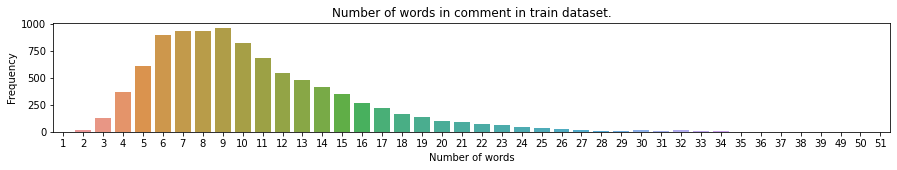

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


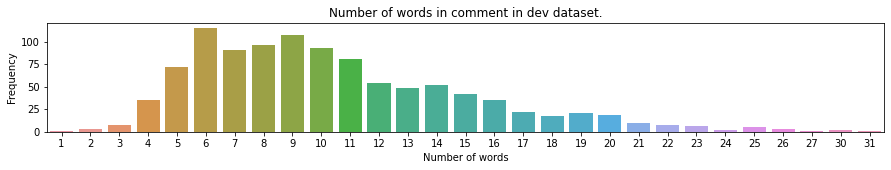

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


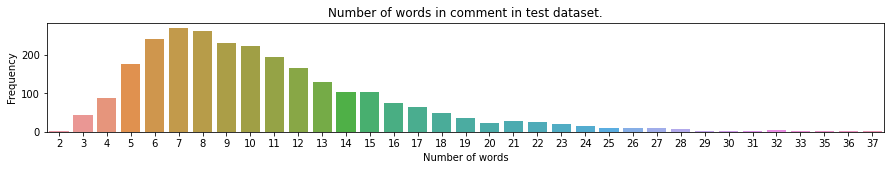

In [ ]:
# Độ dài cmt
def plot_number_word(X, name):
    l = []
    for i in range(len(X)):
        l.append(len(X[i].split()))
    plt.figure(figsize = (15, 2))
    sb.countplot(l)
    plt.title("Number of words in comment in " + name + ' dataset.')
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

plot_number_word(X_train, 'train')
plot_number_word(X_dev, 'dev')
plot_number_word(X_test, 'test')

# ================================================================

In [ ]:
model_name = ["Native Bayes",
              "Logistic Regression",
              "SVM",
              "Text-CNN-fastText",
              "Text-CNN-Wikipedia Word2vec",
              "Text-CNN-BPEmb",
              "Text-CNN-MULTI_WC_F_E_B",
              "Bi-GRU-fastText",
              "Bi-GRU-Wikipedia Word2vec",
              "Bi-GRU-BPEmb",
              "Bi-GRU-MULTI_WC_F_E_B",
              "BERT XLM-R",
              "BERT MULTILINGUAL"
              "FPTAI (cased)",
              "PhoBERT"]

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

x_train.shape, x_dev.shape, x_test.shape

((9458, 79959), (1053, 79959), (2629, 79959))

# Model---Naive Bayes

Accuracy train:  0.8817931909494607
Accuracy dev:  0.6524216524216524
Accuracy test:  0.6785850133130468
F1 macro test:  0.5551945087827144
Recall macro test:  0.5288743149572018
Precision macro test:  0.6961615671037721
F1 micro test:  0.6785850133130468
Recall micro test:  0.6785850133130468
Precision micro test:  0.6785850133130468


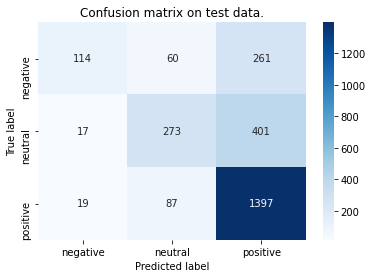

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = ComplementNB()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
        xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[0]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = True)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model---Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy train:  0.8463734404736731
Accuracy dev:  0.691358024691358
Accuracy test:  0.702548497527577
F1 macro test:  0.6211071756443354
Recall macro test:  0.5954862646360334
Precision macro test:  0.6795938658984871
F1 micro test:  0.702548497527577
Recall micro test:  0.702548497527577
Precision micro test:  0.702548497527577


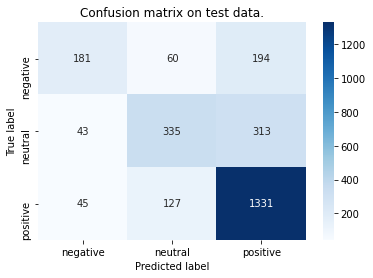

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = LogisticRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)

print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[1]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---SVM

Accuracy train:  0.9031507718333686
Accuracy dev:  0.6723646723646723
Accuracy test:  0.694180296690757
F1 macro test:  0.591488889080734
Recall macro test:  0.5603663386447436
Precision macro test:  0.7030509650338864
F1 micro test:  0.694180296690757
Recall micro test:  0.694180296690757
Precision micro test:  0.694180296690757


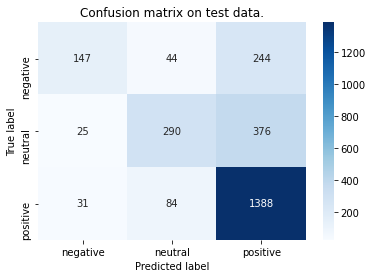

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = SVC()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[2]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# ========================================================

# Model---Text-CNN---FastText

Epoch 1/10
37/37 [==============================] - 45s 49ms/step - loss: 0.5991 - accuracy: 0.5117 - val_loss: 0.5349 - val_accuracy: 0.6068
Epoch 2/10
37/37 [==============================] - 1s 28ms/step - loss: 0.4802 - accuracy: 0.6483 - val_loss: 0.4651 - val_accuracy: 0.6572
Epoch 3/10
37/37 [==============================] - 1s 28ms/step - loss: 0.3799 - accuracy: 0.7515 - val_loss: 0.4450 - val_accuracy: 0.6914
Epoch 4/10
37/37 [==============================] - 1s 29ms/step - loss: 0.3033 - accuracy: 0.8141 - val_loss: 0.4430 - val_accuracy: 0.6942
Epoch 5/10
37/37 [==============================] - 1s 30ms/step - loss: 0.2518 - accuracy: 0.8520 - val_loss: 0.4515 - val_accuracy: 0.6990
Epoch 6/10
37/37 [==============================] - 1s 29ms/step - loss: 0.2090 - accuracy: 0.8846 - val_loss: 0.4751 - val_accuracy: 0.6980
Epoch 7/10
37/37 [==============================] - 1s 31ms/step - loss: 0.1714 - accuracy: 0.9093 - val_loss: 0.5022 - val_accuracy: 0.6961
Epoch 8/10
3

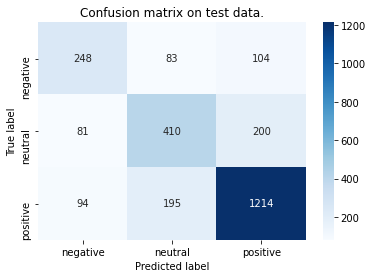

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[3]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---Wikipedia Word2vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
37/37 [==============================] - 3s 49ms/step - loss: 0.6925 - accuracy: 0.5571 - val_loss: 0.4996 - val_accuracy: 0.6543
Epoch 2/10
37/37 [==============================] - 1s 34ms/step - loss: 0.4173 - accuracy: 0.7129 - val_loss: 0.4764 - val_accuracy: 0.6686
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3545 - accuracy: 0.7723 - val_loss: 0.4739 - val_accuracy: 0.6705
Epoch 4/10
37/37 [==============================] - 1s 35ms/step - loss: 0.2959 - accuracy: 0.8310 - val_loss: 0.4927 - val_accuracy: 0.6819
Epoch 5/10
37/37 [==============================] - 1s 35ms/step - loss: 0.2576 - accuracy: 0.8543 - val_loss: 0.4995 - val_accuracy: 0.6781
Epoch 6/10
37/37 [==============================] - 1s 34ms/step - loss: 0.2117 - accuracy: 0.8949 - val_loss: 0.5351 - val_accuracy: 0.6591
Epoch 7/10
37/37 [==============================] - 1s 34ms/step - loss: 0.1823 - accuracy: 0.9104 - val_loss: 0.5240 - val_accuracy: 0.6762
Epoch 8/10
37

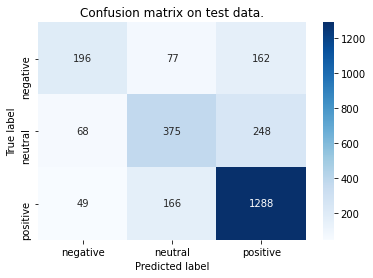

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict
def create_embedding_matrix(model_filepath, word2id):

    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[4]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---BPEmb

     |████████████████████████████████| 1.2MB 7.5MB/s 
downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.model


100%|██████████| 3659179/3659179 [00:00<00:00, 4684478.21B/s]


downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.d300.w2v.bin.tar.gz


100%|██████████| 223674818/223674818 [00:10<00:00, 22314494.83B/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
37/37 [==============================] - 3s 40ms/step - loss: 0.5865 - accuracy: 0.5740 - val_loss: 0.4987 - val_accuracy: 0.6334
Epoch 2/10
37/37 [==============================] - 1s 32ms/step - loss: 0.4452 - accuracy: 0.6851 - val_loss: 0.4588 - val_accuracy: 0.6781
Epoch 3/10
37/37 [==============================] - 1s 32ms/step - loss: 0.3665 - accuracy: 0.7645 - val_loss: 0.4484 - val_accuracy: 0.6952
Epoch 4/10
37/37 [==============================] - 1s 31ms/step - loss: 0.3068 - accuracy: 0.8166 - val_loss: 0.4534 - val_accuracy: 0.7066
Epoch 5/10
37/37 [==============================] - 1s 31ms/step - loss: 0.2488 - accuracy: 0.8632 - val_loss: 0.4688 - val_accuracy: 0.6942
Epoch 6/10
37/37 [==============================] - 1s 31ms/step - loss: 0.1964 - accuracy: 0.9074 - val_loss: 0.4705 - val_accuracy: 0.7094
Epoch 7/10
37/37 [==============================] - 1s 31ms/step - loss: 0.1652 - accuracy: 0.9240 - val_loss: 0.5110 - val_accuracy: 0.7047
Epoch 8/10
37

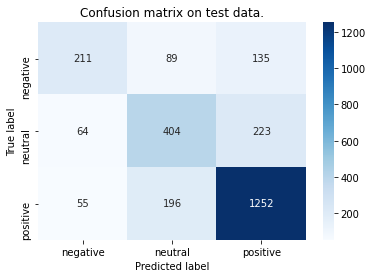

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]
    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors
    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[5]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---MULTI_WC_F_E_B

Epoch 1/10
37/37 [==============================] - 2s 38ms/step - loss: 0.6080 - accuracy: 0.5088 - val_loss: 0.5313 - val_accuracy: 0.6030
Epoch 2/10
37/37 [==============================] - 1s 29ms/step - loss: 0.4846 - accuracy: 0.6415 - val_loss: 0.4529 - val_accuracy: 0.6866
Epoch 3/10
37/37 [==============================] - 1s 32ms/step - loss: 0.3812 - accuracy: 0.7538 - val_loss: 0.4358 - val_accuracy: 0.7094
Epoch 4/10
37/37 [==============================] - 1s 30ms/step - loss: 0.3075 - accuracy: 0.8073 - val_loss: 0.4426 - val_accuracy: 0.7198
Epoch 5/10
37/37 [==============================] - 1s 31ms/step - loss: 0.2477 - accuracy: 0.8576 - val_loss: 0.4777 - val_accuracy: 0.7085
Epoch 6/10
37/37 [==============================] - 1s 31ms/step - loss: 0.2035 - accuracy: 0.8853 - val_loss: 0.4915 - val_accuracy: 0.7075
Epoch 7/10
37/37 [==============================] - 1s 32ms/step - loss: 0.1673 - accuracy: 0.9082 - val_loss: 0.5195 - val_accuracy: 0.7075
Epoch 8/10
37

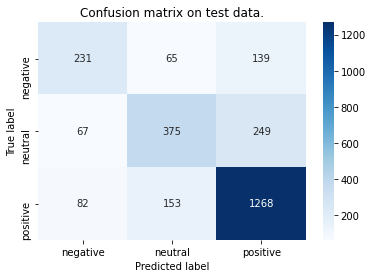

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[6]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# =============================================

# Model---Bi-GRU---FastText

Epoch 1/10
37/37 [==============================] - 13s 76ms/step - loss: 0.6287 - accuracy: 0.5114 - val_loss: 0.5546 - val_accuracy: 0.5499
Epoch 2/10
37/37 [==============================] - 2s 45ms/step - loss: 0.5191 - accuracy: 0.5918 - val_loss: 0.4659 - val_accuracy: 0.6686
Epoch 3/10
37/37 [==============================] - 2s 45ms/step - loss: 0.4206 - accuracy: 0.7014 - val_loss: 0.4400 - val_accuracy: 0.7018
Epoch 4/10
37/37 [==============================] - 2s 45ms/step - loss: 0.3559 - accuracy: 0.7704 - val_loss: 0.4415 - val_accuracy: 0.7066
Epoch 5/10
37/37 [==============================] - 2s 45ms/step - loss: 0.3180 - accuracy: 0.7967 - val_loss: 0.4547 - val_accuracy: 0.6961
Epoch 6/10
37/37 [==============================] - 2s 45ms/step - loss: 0.2849 - accuracy: 0.8241 - val_loss: 0.5002 - val_accuracy: 0.6771
Epoch 7/10
37/37 [==============================] - 2s 45ms/step - loss: 0.2659 - accuracy: 0.8331 - val_loss: 0.4900 - val_accuracy: 0.6895
Epoch 8/10
3

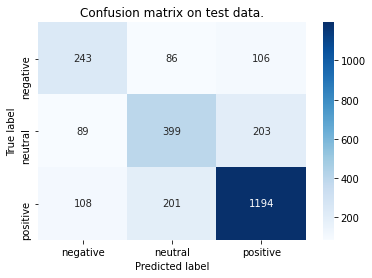

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[7]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---Wikipedia Word2vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
37/37 [==============================] - 8s 89ms/step - loss: 0.6309 - accuracy: 0.4893 - val_loss: 0.5352 - val_accuracy: 0.6002
Epoch 2/10
37/37 [==============================] - 2s 58ms/step - loss: 0.5155 - accuracy: 0.6179 - val_loss: 0.4725 - val_accuracy: 0.6572
Epoch 3/10
37/37 [==============================] - 2s 58ms/step - loss: 0.4451 - accuracy: 0.6839 - val_loss: 0.4479 - val_accuracy: 0.6904
Epoch 4/10
37/37 [==============================] - 2s 58ms/step - loss: 0.3960 - accuracy: 0.7360 - val_loss: 0.4434 - val_accuracy: 0.7037
Epoch 5/10
37/37 [==============================] - 2s 57ms/step - loss: 0.3657 - accuracy: 0.7569 - val_loss: 0.4425 - val_accuracy: 0.7066
Epoch 6/10
37/37 [==============================] - 2s 58ms/step - loss: 0.3293 - accuracy: 0.7907 - val_loss: 0.4539 - val_accuracy: 0.6961
Epoch 7/10
37/37 [==============================] - 2s 58ms/step - loss: 0.3094 - accuracy: 0.8001 - val_loss: 0.4581 - val_accuracy: 0.7094
Epoch 8/10
37

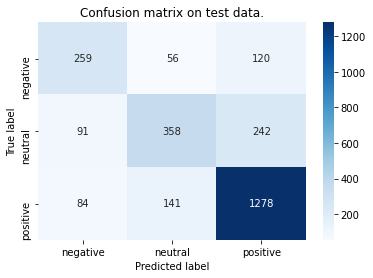

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[8]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---BPEmb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
37/37 [==============================] - 7s 76ms/step - loss: 0.6157 - accuracy: 0.4857 - val_loss: 0.5449 - val_accuracy: 0.5831
Epoch 2/10
37/37 [==============================] - 2s 48ms/step - loss: 0.5181 - accuracy: 0.6004 - val_loss: 0.4866 - val_accuracy: 0.6467
Epoch 3/10
37/37 [==============================] - 2s 49ms/step - loss: 0.4425 - accuracy: 0.6902 - val_loss: 0.4446 - val_accuracy: 0.6914
Epoch 4/10
37/37 [==============================] - 2s 48ms/step - loss: 0.3864 - accuracy: 0.7388 - val_loss: 0.4424 - val_accuracy: 0.7047
Epoch 5/10
37/37 [==============================] - 2s 48ms/step - loss: 0.3587 - accuracy: 0.7650 - val_loss: 0.4386 - val_accuracy: 0.7255
Epoch 6/10
37/37 [==============================] - 2s 48ms/step - loss: 0.3263 - accuracy: 0.7965 - val_loss: 0.4528 - val_accuracy: 0.7094
Epoch 7/10
37/37 [==============================] - 2s 47ms/step - loss: 0.2812 - accuracy: 0.8307 - val_loss: 0.4532 - val_accuracy: 0.7151
Epoch 8/10
37

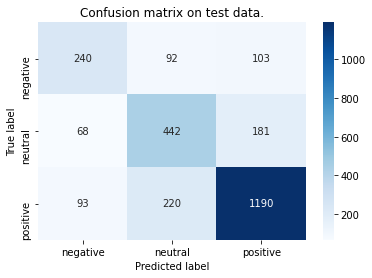

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[9]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---MULTI_WC_F_E_B

Epoch 1/10
37/37 [==============================] - 7s 77ms/step - loss: 0.6348 - accuracy: 0.5054 - val_loss: 0.5450 - val_accuracy: 0.5831
Epoch 2/10
37/37 [==============================] - 2s 47ms/step - loss: 0.5069 - accuracy: 0.6104 - val_loss: 0.4610 - val_accuracy: 0.6724
Epoch 3/10
37/37 [==============================] - 2s 47ms/step - loss: 0.4097 - accuracy: 0.7118 - val_loss: 0.4436 - val_accuracy: 0.6999
Epoch 4/10
37/37 [==============================] - 2s 47ms/step - loss: 0.3559 - accuracy: 0.7712 - val_loss: 0.4468 - val_accuracy: 0.7085
Epoch 5/10
37/37 [==============================] - 2s 47ms/step - loss: 0.3066 - accuracy: 0.8081 - val_loss: 0.4635 - val_accuracy: 0.6942
Epoch 6/10
37/37 [==============================] - 2s 47ms/step - loss: 0.2747 - accuracy: 0.8324 - val_loss: 0.4906 - val_accuracy: 0.6971
Epoch 7/10
37/37 [==============================] - 2s 46ms/step - loss: 0.2433 - accuracy: 0.8547 - val_loss: 0.5123 - val_accuracy: 0.6933
Epoch 8/10
37

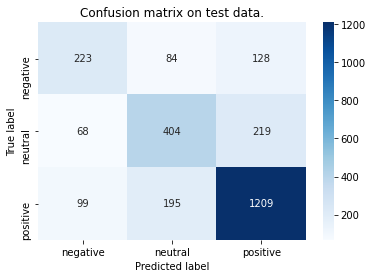

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[10]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# =========================================================

# BERT XLM-R

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

***** Running training *****
  Num examples = 9458
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2072


Step,Training Loss
500,0.923900
1000,0.728900
1500,0.592100
2000,0.462800


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 9458
  Batch size = 16


***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.8869739902727849
Accuracy dev:  0.7226970560303894
Accuracy test:  0.7356409281095474
F1 macro test:  0.680012272839186
Recall macro test:  0.675122938081785
Precision macro test:  0.6857517551232144
F1 micro test:  0.7356409281095473
Recall micro test:  0.7356409281095474
Precision micro test:  0.7356409281095474


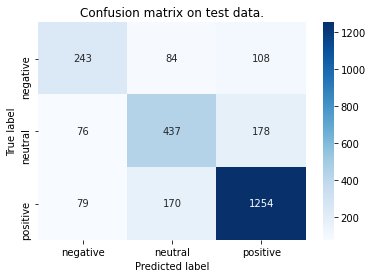

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Process/Tail'
result.to_csv(path + '/' + 'xlm-r.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[11]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# BERT MULTILINGUAL

Accuracy train:  0.9504123493338972
Accuracy dev:  0.7056030389363722
Accuracy test:  0.7082540890072271
F1 macro test:  0.6661551966427003
Recall macro test:  0.6770769808808508
Precision macro test:  0.6580206793870039
F1 micro test:  0.7082540890072271
Recall micro test:  0.7082540890072271
Precision micro test:  0.7082540890072271


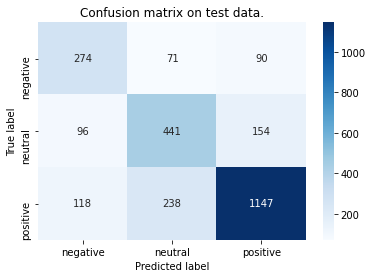

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Process/Tail'
result.to_csv(path + '/' + 'bert-multi.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = "a")

# BERT FPTAI/vibert-base-cased



https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmppsf8ucwc


storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
creating metadata file for /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
loading configuration file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
Model config BertConfig {
  "_num_labels": 2,
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
creating metadata file for /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
loading weights file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a


Some weights of the model checkpoint at FPTAI/vibert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
creating metadata file for /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4


loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/tokenizer.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/tokenizer_config.json from cache at None
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). 

Step,Training Loss
500,0.919700
1000,0.755100
1500,0.649700
2000,0.534900
2500,0.402000
3000,0.321900
3500,0.224900
4000,0.163600


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9794882639035737
Accuracy dev:  0.6904083570750238
Accuracy test:  0.702928870292887
F1 macro test:  0.6554562857112319
Recall macro test:  0.6574228734783318
Precision macro test:  0.6539185348402349
F1 micro test:  0.702928870292887
Recall micro test:  0.702928870292887
Precision micro test:  0.702928870292887


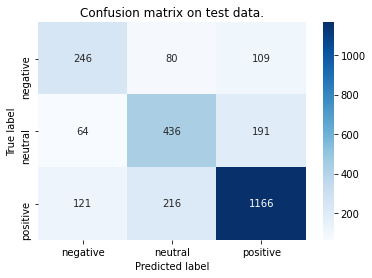

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('FPTAI/vibert-base-cased', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('FPTAI/vibert-base-cased')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Process/Tail'
result.to_csv(path + '/' + 'vibert-base-cased.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[13]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')

# BERT vinai/phobert-base

https://huggingface.co/vinai/phobert-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpazueegl7


storing https://huggingface.co/vinai/phobert-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
creating metadata file for /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  

storing https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
creating metadata file for /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
loading weights file https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

storing https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
creating metadata file for /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmph4dz2wj0


storing https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes in cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
creating metadata file for /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd


loading file https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
loading file https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes from cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
loading file https://huggingface.co/vinai/phobert-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/tokenizer.json from cache at None
Adding <mask> to the vocabulary
Special tokens have b

Step,Training Loss
500,0.885100
1000,0.699700
1500,0.601200
2000,0.505800
2500,0.416000
3000,0.352700
3500,0.261900
4000,0.204200


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9662719390991753
Accuracy dev:  0.7435897435897436
Accuracy test:  0.7596044123240776
F1 macro test:  0.7203580356938474
Recall macro test:  0.7194521736063334
Precision macro test:  0.7219987187492066
F1 micro test:  0.7596044123240776
Recall micro test:  0.7596044123240776
Precision micro test:  0.7596044123240776


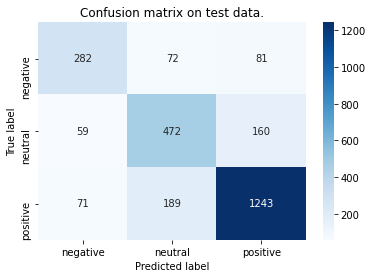

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('vinai/phobert-base', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Process/Tail'
result.to_csv(path + '/' + 'phoBert.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[14]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Process/Tail/APD_Process_tail.csv",
          index = None, header = False, mode = 'a')